In [3]:
import math
x = []
y = []
z = []
x.append([])
y.append([])
z.append([])
idx = 0
min_x = [math.inf]
min_y = [math.inf]
min_z = [math.inf]
max_x = [-math.inf]
max_y = [-math.inf]
max_z = [-math.inf]
with open("/Users/Tiger/nexo_py/txt_OLD/gamma_x.txt") as f1, open("/Users/Tiger/nexo_py/txt_OLD/gamma_y.txt") as f2, open("/Users/Tiger/nexo_py/txt_OLD/gamma_z.txt") as f3:
    for (line1,line2,line3) in zip(f1,f2,f3):
        if( line1 != "seprate\n"):
            x[idx].append( float(line1) )
            y[idx].append( float(line2) )
            z[idx].append( float(line3) )
            if(max_x[idx]<float(line1)):
                max_x[idx]=float(line1)
            if(min_x[idx]>float(line1)):
                min_x[idx]=float(line1)
            if(max_y[idx]<float(line2)):
                max_y[idx]=float(line2)
            if(min_y[idx]>float(line2)):
                min_y[idx]=float(line2)
            if(max_z[idx]<float(line3)):
                max_z[idx]=float(line3)
            if(min_z[idx]>float(line3)):
                min_z[idx]=float(line3)
        else:
            idx+=1
            x.append([])
            y.append([])
            z.append([])
            min_x.append(math.inf)
            min_y.append(math.inf)
            min_z.append(math.inf)
            max_x.append(-math.inf)
            max_y.append(-math.inf)
            max_z.append(-math.inf)
with open("/Users/Tiger/nexo_py/txt_OLD/bb0n_x.txt") as f1, open("/Users/Tiger/nexo_py/txt_OLD/bb0n_y.txt") as f2, open("/Users/Tiger/nexo_py/txt_OLD/bb0n_z.txt") as f3:
    for (line1,line2,line3) in zip(f1,f2,f3):
        if( line1 != "seprate\n"):
            x[idx].append( float(line1) )
            y[idx].append( float(line2) )
            z[idx].append( float(line3) )
            if(max_x[idx]<float(line1)):
                max_x[idx]=float(line1)
            if(min_x[idx]>float(line1)):
                min_x[idx]=float(line1)
            if(max_y[idx]<float(line2)):
                max_y[idx]=float(line2)
            if(min_y[idx]>float(line2)):
                min_y[idx]=float(line2)
            if(max_z[idx]<float(line3)):
                max_z[idx]=float(line3)
            if(min_z[idx]>float(line3)):
                min_z[idx]=float(line3)
        else:
            idx+=1
            x.append([])
            y.append([])
            z.append([])
            min_x.append(math.inf)
            min_y.append(math.inf)
            min_z.append(math.inf)
            max_x.append(-math.inf)
            max_y.append(-math.inf)
            max_z.append(-math.inf)
x.pop()
y.pop()
z.pop()
print(len(x))
min_x.pop()
min_y.pop()
min_z.pop()
max_x.pop()
max_y.pop()
max_z.pop()

26250


-inf

In [4]:
eng=[]
eng.append([])
idx = 0
with open("/Users/Tiger/nexo_py/txt_OLD/gamma_EnergyDeposit.txt") as f1:
    for line in f1:
        if( line != "seprate\n"):
            eng[idx].append( float(line) )
        else:
            idx+=1
            eng.append([])
eng.pop()
gamma_length = len(eng)
eng.append([])
with open("/Users/Tiger/nexo_py/txt_OLD/bb0n_EnergyDeposit.txt") as f1:
    for line in f1:
        if( line != "seprate\n"):
            eng[idx].append( float(line) )
        else:
            idx+=1
            eng.append([])
            
eng.pop()

[]

In [5]:
print(sum(eng[0]))
print(sum(eng[10040]))
print(gamma_length)

2.457794999999999
2.457793
16250


In [6]:
import numpy as np
single_x = []
single_y = []
single_z = []
single_E = []
single_idx = []
average_x = 0
average_y = 0
average_z = 0
count = 0
cluster_count = 0
single_gamma_length = 0
center_x = []
center_y = []
center_z = []
for i in range(0, len(x)):
    cx = []
    cy = []
    cz = []
    average_x = 0
    average_y = 0
    average_z = 0
    sum_x = 0
    sum_y = 0
    sum_z = 0
    if (i == gamma_length):
        single_gamma_length = len(single_x)
    #if (len(single_x) == 2*single_gamma_length and single_gamma_length != 0):
        #break
    for j in range (4, len(x[i]) - 1):
        sum_x += x[i][j]
        sum_y += y[i][j]
        sum_z += z[i][j]
        average_x = sum_x/(j+1 - count - 4)
        average_y = sum_y/(j+1 - count - 4)
        average_z = sum_z/(j+1 - count - 4)
        cx.append(average_x)
        cy.append(average_y)
        cz.append(average_z)
        if (math.sqrt((abs(average_x - x[i][j + 1])**2 + 
            abs(average_y - y[i][j + 1])**2 + 
            abs(average_z - z[i][j + 1])**2)) > 7):
            cluster_count += 1
            count = j
            sum_x = 0
            sum_y = 0
            sum_z = 0
    if (cluster_count == 0):
        single_x.append(x[i])
        single_y.append(y[i])
        single_z.append(z[i])
        single_E.append(eng[i])
        single_idx.append(i)
        center_x.append(cx)
        center_y.append(cy)
        center_z.append(cz)
    count = 0
    cluster_count = 0
print(gamma_length)
print(single_gamma_length)            
print(len(single_x))        

16250
1157
9282


In [7]:
print(len(single_idx))

9282


In [14]:
filex = open("Single_x.txt","a+")
filey = open("Single_y.txt","a+")
filez = open("Single_z.txt","a+")
fileE = open("Single_E.txt","a+")
for i in range(0, len(single_x)):
    for j in range(0, len(single_x[i])):
        filex.write(str(single_x[i][j])+"\n")
        filey.write(str(single_y[i][j])+"\n")
        filez.write(str(single_z[i][j])+"\n")
        fileE.write(str(single_E[i][j])+"\n")
    if(i < single_gamma_length):
        filex.write("gamma\n")
        filey.write("gamma\n")
        filez.write("gamma\n")
        fileE.write("gamma\n")
    else :
        filex.write("bb0n\n")
        filey.write("bb0n\n")
        filez.write("bb0n\n")
        fileE.write("bb0n\n")

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
for i in range(0, 5):
    print("gamma")
    temp1 = random.randint(0, single_gamma_length)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #ax.scatter(center_x[temp1], center_y[temp1], center_z[temp1], zdir='z', c= 'red')
    ax.scatter(single_x[15], single_y[15], single_z[15], zdir='z', c= 'blue')
for i in range(5, 10):
    temp1 = random.randint(single_gamma_length, 2*single_gamma_length)
    print("bb0n")
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(center_x[temp1], center_y[temp1], center_z[temp1], zdir='z', c= 'red')
    ax.scatter(single_x[temp1], single_y[temp1], single_z[temp1], zdir='z', c= 'blue')

import numpy as np
gamma_count = 0
count = 0
single_x = []
single_y = []
single_z = []
single_E = []
single_idx = []
for i in range(0, len(x)):
    average_x = np.average(x[i][4:], weights = eng[i][4:])
    average_y = np.average(y[i][4:], weights = eng[i][4:])
    average_z = np.average(z[i][4:], weights = eng[i][4:])
    #if (i == gamma_length):
        #single_gamma_length = len(single_x)
    #if (len(single_x) == 2*single_gamma_length and single_gamma_length != 0):
        #break
    for j in range (4, len(x[i])): 
        if (math.sqrt((abs(average_x - x[i][j])**2 + 
            abs(average_y - y[i][j])**2 + 
            abs(average_z - z[i][j])**2)) > 7):
            cluster_count += 1
            break
    if (cluster_count == 0):
        if (i < gamma_length):
            gamma_count += 1
        count += 1
        single_x.append(x[i])
        single_y.append(y[i])
        single_z.append(z[i])
        single_E.append(eng[i])
        single_idx.append(i)
    cluster_count = 0
print(count)
print(gamma_count)            
print(len(single_x))        

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
if(1 > 0):
    print("gamma")
    temp1 = random.randint(0, single_gamma_length)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #ax.scatter(center_x[temp1], center_y[temp1], center_z[temp1], zdir='z', c= 'red')
    ax.scatter(single_x[104], single_y[104], single_z[104], zdir='z', c= 'blue')
    ax.scatter(single_x[137], single_y[137], single_z[137], zdir='z', c= 'blue')
    ax.scatter(single_x[96], single_y[96], single_z[96], zdir='z', c= 'blue')
for i in range(5, 10):
    temp1 = random.randint(single_gamma_length, 2*single_gamma_length)
    print("bb0n")
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #ax.scatter(center_x[temp1], center_y[temp1], center_z[temp1], zdir='z', c= 'red')
    ax.scatter(single_x[temp1], single_y[temp1], single_z[temp1], zdir='z', c= 'blue')

In [248]:
x_average_center = []
y_average_center = []
z_average_center = []
for i in range(0, len(single_x)):
    x_center = np.average(single_x[i], weights = single_E[i])
    x_average_center.append(x_center)
    y_center = np.average(single_y[i], weights = single_E[i])
    y_average_center.append(y_center)
    z_center = np.average(single_z[i], weights = single_E[i])
    z_average_center.append(z_center)

In [249]:
import math
x_radius = []
y_radius = []
z_radius = []

x_radius.append([])
y_radius.append([])
z_radius.append([])

radius = []
radius.append([])


for i in range(0, len(single_idx)):
    for j in range(0, len(single_x[i])):
        x_radius[i].append(abs(single_x[i][j] - x_average_center[i]))
        y_radius[i].append(abs(single_y[i][j] - y_average_center[i]))
        z_radius[i].append(abs(single_z[i][j] - z_average_center[i]))
        radius[i].append(math.sqrt(x_radius[i][j]**(2) + y_radius[i][j]**(2) + z_radius[i][j]**(2)))
        
    x_radius.append([])
    y_radius.append([])
    z_radius.append([])
    radius.append([])

x_radius.pop()
y_radius.pop()
z_radius.pop()
radius.pop()

[]

In [250]:
x_average_radius = []
y_average_radius = []
z_average_radius = []
average_radius = []
average_radius.append([])
for i in range (0,len(single_idx)):
    x_average_radius.append(np.average(x_radius[i], weights = single_E[i]))
    y_average_radius.append(np.average(y_radius[i], weights = single_E[i]))
    z_average_radius.append(np.average(z_radius[i], weights = single_E[i]))
    for j in range (0, len(x_radius[i])):
        average_radius[i].append(math.sqrt(x_radius[i][j]**(2) + y_radius[i][j]**(2) + z_radius[i][j]**(2)))
    average_radius.append([])
average_radius.pop()


[]

In [251]:
r_cutoff = 7

In [252]:
weighted_average_radius = []
cut_x_radius = []
cut_y_radius = []
cut_z_radius = []
cut_E = []
cut_single_E = []
cut_single_x = []
cut_single_y = []
cut_single_z = []
cut_single_idx = []
count = 0
print(len(single_idx))
print(len(average_radius))
print(len(single_E))
print (single_gamma_length)
for i in range (0,len(single_idx)):
    weighted_average_radius.append(np.average(average_radius[i], weights = single_E[i]))
    #print (np.average(average_radius[i], weights = single_E[i]))
for i in range(0, len(weighted_average_radius)):
    if (i < single_gamma_length and weighted_average_radius[i] <= r_cutoff):
        count += 1
        cut_single_idx.append(single_idx[i])
        cut_single_E.append(single_E[i])
        cut_single_x.append(single_x[i])
        cut_single_y.append(single_y[i])
        cut_single_z.append(single_z[i])
        cut_x_radius.append(x_radius[i])
        cut_y_radius.append(y_radius[i])
        cut_z_radius.append(z_radius[i])
for i in range(single_gamma_length, len(weighted_average_radius)):
    if (weighted_average_radius[i] <= r_cutoff):
        cut_single_idx.append(single_idx[i])
        cut_single_E.append(single_E[i])
        cut_single_x.append(single_x[i])
        cut_single_y.append(single_y[i])
        cut_single_z.append(single_z[i])
        cut_x_radius.append(x_radius[i])
        cut_y_radius.append(y_radius[i])
        cut_z_radius.append(z_radius[i])
    if (len(cut_single_idx) == 2* count and count != 0):
        break
        #weighted_average_radius.pop(i)
print(count)
cut_single_gamma_length = count
print(len(cut_single_idx))

9282
9282
9282
1157
1157
2314


In [253]:
x_relative_radius = []
y_relative_radius = []
z_relative_radius = []
x_relative_radius.append([])
y_relative_radius.append([])
z_relative_radius.append([])
for i in range(0, len(cut_single_idx)):
    max_x_radius = max(cut_x_radius[i])
    max_y_radius = max(cut_y_radius[i])
    max_z_radius = max(cut_z_radius[i])
    min_x_radius = min(cut_x_radius[i])
    min_y_radius = min(cut_y_radius[i])
    min_z_radius = min(cut_z_radius[i])
    for j in range(0, len(cut_single_x[i])):
        x_relative_radius[i].append((cut_x_radius[i][j] - min_x_radius)/(max_x_radius - min_x_radius))
        y_relative_radius[i].append((cut_y_radius[i][j] - min_y_radius)/(max_y_radius - min_y_radius))
        z_relative_radius[i].append((cut_z_radius[i][j] - min_z_radius)/(max_z_radius - min_z_radius))
    x_relative_radius.append([])
    y_relative_radius.append([])
    z_relative_radius.append([])
x_relative_radius.pop()
y_relative_radius.pop()
z_relative_radius.pop()

[]

In [254]:
print(len(x_relative_radius))
print(count)

2314
1157


In [255]:
################################################################################################
#x_relative_radius = []
#y_relative_radius = []
#z_relative_radius = []
#max_x_radius = max(x_average_radius)
#max_y_radius = max(y_average_radius)
#max_z_radius = max(z_average_radius)
#min_x_radius = min(x_average_radius)
#min_y_radius = min(y_average_radius)
#min_z_radius = min(z_average_radius)

#for i in range(0, len(single_idx)): 
    #x_relative_radius.append(x_average_radius[i]/(max_x_radius - min_x_radius))
    #y_relative_radius.append(y_average_radius[i]/(max_y_radius - min_y_radius))
    #z_relative_radius.append(z_average_radius[i]/(max_z_radius - min_z_radius))

In [256]:
travel_d_instep = []
travel_d_instep.append([])
temp = 0
travel_distance = []
for i in range(0, len(x_relative_radius)):
    for j in range(0, len(x_relative_radius[i]) - 1):
        temp += math.sqrt((abs(cut_x_radius[i][j] - cut_x_radius[i][j + 1])**2 + 
                           abs(cut_y_radius[i][j] - cut_y_radius[i][j + 1])**2 + 
                           abs(cut_z_radius[i][j] - cut_z_radius[i][j + 1])**2))
        travel_d_instep[i].append(math.sqrt((cut_x_radius[i][j] - cut_x_radius[i][j + 1])**2 + 
                                          (cut_y_radius[i][j] - cut_y_radius[i][j + 1])**2 + 
                                          (cut_z_radius[i][j] - cut_z_radius[i][j + 1])**2))
    travel_distance.append(temp)
    travel_d_instep.append([])
    temp = 0

temp = 0

In [258]:
temp = np.ndarray(shape=(40,40,40), dtype=float)
temp.fill(0)
train=[]
for i in range(0, len(cut_single_idx)):
    for j in range(0, len(cut_single_x[i]) - 1):
        if( max_x[single_idx[i]]>min_x[single_idx[i]]):
            cur_x = ((cut_single_x[i][j]-min_x[cut_single_idx[i]])/(max_x[cut_single_idx[i]]-min_x[cut_single_idx[i]]))
        else: 
            cur_x = 0.5
        if( max_y[single_idx[i]]>min_y[single_idx[i]]):
            cur_y = ((cut_single_y[i][j]-min_y[cut_single_idx[i]])/(max_y[cut_single_idx[i]]-min_y[cut_single_idx[i]]))
        else: 
            cur_y = 0.5
        if( max_z[single_idx[i]]>min_z[single_idx[i]]):
            cur_z = ((cut_single_z[i][j]-min_z[cut_single_idx[i]])/(max_z[cut_single_idx[i]]-min_z[cut_single_idx[i]]))
        else:
            cur_z = 0.5
        
        if (cur_x < 0):
            cur_x = 0
        if (cur_y < 0):
            cur_y = 0
        if (cur_z < 0):
            cur_z = 0
        temp[int((40*x_relative_radius[i][j] - 1)*cur_x)][int((40*y_relative_radius[i][j] - 1)*cur_y)][int((40*z_relative_radius[i][j] - 1)*cur_z)] += cut_single_E[i][j]
    train.append(temp)
    temp = np.ndarray(shape=(40,40,40), dtype=float)
    temp.fill(0)
print(len(train))

2314


In [259]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def visualize(idx):
    x,y,z = train[idx].nonzero()
    sum(train[idx])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, zdir='z', c= 'red')
    plt.savefig('25_bb0n.png')
    plt.show()
    
    

2314
1157
gamma
47


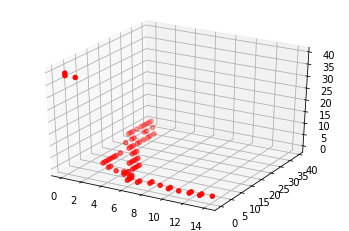

bb0n


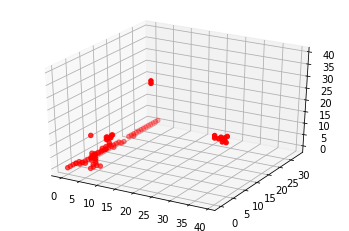

gamma
6


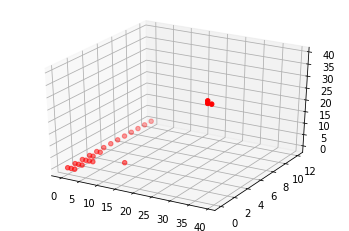

bb0n


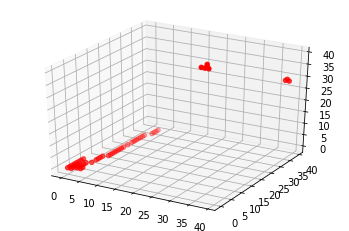

gamma
42


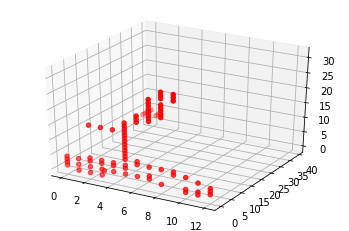

bb0n


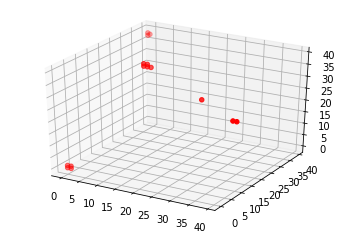

gamma
67


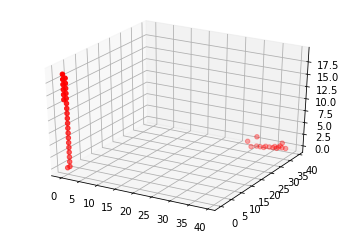

bb0n


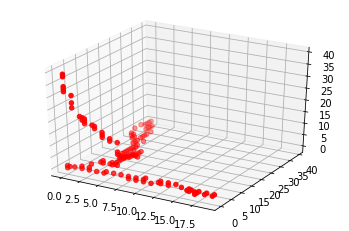

gamma
11


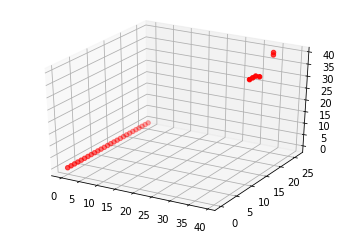

bb0n


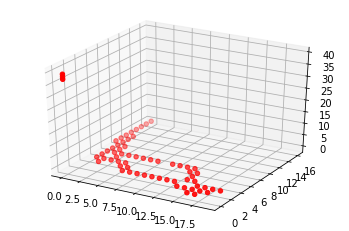

gamma
79


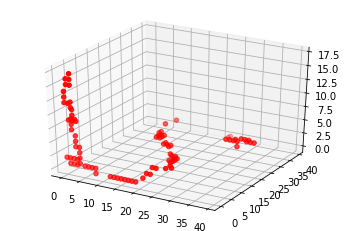

bb0n


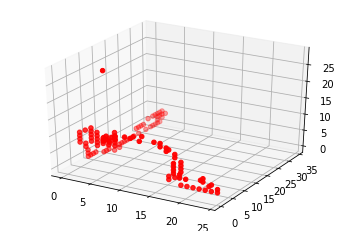

gamma
4


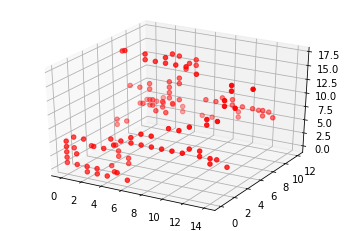

bb0n


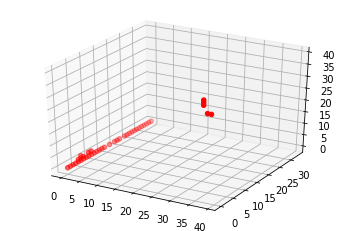

gamma
72


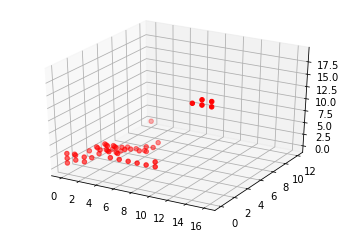

bb0n


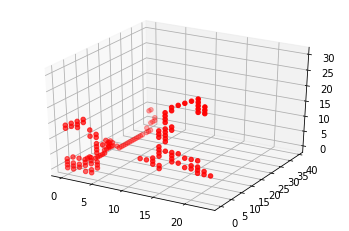

gamma
14


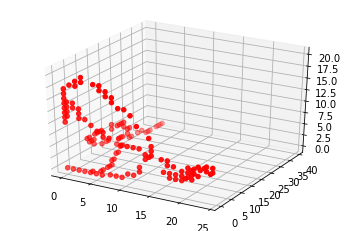

bb0n


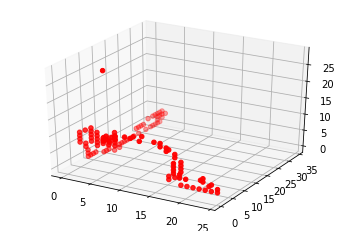

gamma
12


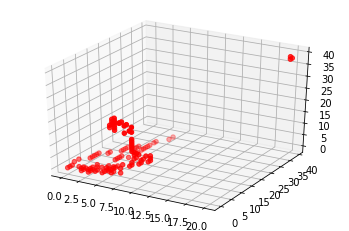

bb0n


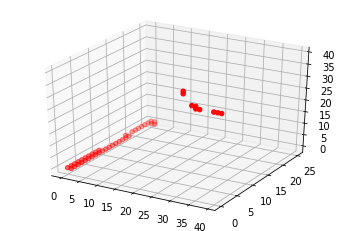

In [260]:
import random
print(len(train))
print (single_gamma_length)
temp1 = 0
temp2 = 0
for i in range(0, 10):
    print("gamma")
    temp1 = random.randint(0, count)
    print (temp1)
    visualize(temp1)
    print("bb0n")
    temp2 = random.randint(count, count*2-1)
    #print (556)
    visualize(temp2)
    


In [261]:
label = np.ndarray(shape=(len(train)), dtype=int)
label[:cut_single_gamma_length].fill(1)
label[cut_single_gamma_length:].fill(0)
print (len(train))
print(len(label))

2314
2314


In [262]:
import tensorflow as tf
from sklearn.utils import shuffle
train,label = shuffle(train,label)
X_train  = train[:int(len(train) - 90)]
Y_train  = label[:int(len(train) - 90)]
X_validation = train[int(len(train) - 90):]
Y_validation = label[int(len(train) - 90):]
print(len(X_train))
print(len(X_validation))

2224
90


In [263]:
X_train, Y_train = shuffle(X_train, Y_train)
X_Validation, Y_Validation = shuffle(X_validation, Y_validation)

In [264]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)
#Y_train

In [265]:
EPOCHS = 30
BATCH_SIZE = 30

In [266]:
from tensorflow.contrib.layers import flatten
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    layer_depth = {
        'layer_1' : 6,
        'layer_2' : 16,
        'layer_3' : 64,
        'layer_f1' : 20
    }

    
    conv1_w = tf.Variable(tf.truncated_normal(shape = [20,20,40,20],mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(20))
    conv1 = tf.nn.conv2d(x,conv1_w, strides = [1,1,1,1], padding = 'VALID') + conv1_b 
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

     #TODO: Pooling. Input = 28x28x6. Output = 14x14x6. 8
    pool_1 = tf.nn.max_pool(conv1,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16. 6
    conv2_w = tf.Variable(tf.truncated_normal(shape = [10,10,20,10], mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(10))
    conv2 = tf.nn.conv2d(pool_1, conv2_w, strides = [1,1,1,1], padding = 'VALID') + conv2_b
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    
    #pool_2 = tf.nn.max_pool(conv2,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16. 
    conv3_w = tf.Variable(tf.truncated_normal(shape = [1,1,10,5], mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(5))
    conv3 = tf.nn.conv2d(conv2, conv3_w, strides = [1,1,1,1], padding = 'VALID') + conv3_b
    # TODO: Activation.
    conv3 = tf.nn.relu(conv3)
    
    #pool_3 = tf.nn.max_pool(conv3,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    conv4_w = tf.Variable(tf.truncated_normal(shape = [1,1,5,1], mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(1))
    conv4 = tf.nn.conv2d(conv3, conv4_w, strides = [1,1,1,1], padding = 'VALID') + conv4_b
    # TODO: Activation.
    conv4 = tf.nn.relu(conv4)
    
    # TODO: Flatten. Input = 5x5x16. Output = 400. 2x2x16
    fc1 = flatten(conv4)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120. 64
    fc1_w = tf.Variable(tf.truncated_normal(shape = (1,100), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(100))
    fc1 = tf.matmul(fc1,fc1_w) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    #print(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84. 20 5
    fc2_w = tf.Variable(tf.truncated_normal(shape = (100,64), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(64))
    fc2 = tf.matmul(fc1,fc2_w) + fc2_b
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    fc3_w = tf.Variable(tf.truncated_normal(shape = (64,20), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(20))
    fc3 = tf.matmul(fc2,fc3_w) + fc3_b
    # TODO: Activation.
    fc3 = tf.nn.relu(fc3)
    
    fc4_w = tf.Variable(tf.truncated_normal(shape = (20,5), mean = mu, stddev = sigma))
    fc4_b = tf.Variable(tf.zeros(5))
    fc4 = tf.matmul(fc3,fc4_w) + fc4_b
    # TODO: Activation.
    fc4 = tf.nn.relu(fc4)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10. 5 2
    fc5_w = tf.Variable(tf.truncated_normal(shape = (5,2), mean = mu , stddev = sigma))
    fc5_b = tf.Variable(tf.zeros(2))
    logits = tf.matmul(fc4, fc5_w) + fc5_b
    return logits



In [267]:
x_t = tf.placeholder(tf.float32, (None,40,40,40))
y_t = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y_t, 2)

In [268]:
rate = 0.0003

logits = LeNet(x_t)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf. train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(cross_entropy)

In [269]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate_1(X_data, Y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], Y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x_t: batch_x, y_t: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def evaluate_2(X_data):
    sess = tf.get_default_session()
    result = sess.run(tf.argmax(logits, 1), feed_dict={x_t:X_data})
    return result


#def choose(X_data, y_data):
    #X_data, y_data = shuffle(X_data, y_data)
    #num_examples = len(X_data)
    #total_accuracy = 0
    #sess = tf.get_default_session()
    #for offset in range(0, num_examples, BATCH_SIZE):
        #batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #prediction = sess.run(correct_prediction, feed_dict={x: batch_x, y: batch_y})
    #return 0

In [270]:
from scipy.interpolate import interp1d
with tf.Session() as sess:

    f_p_grid_25_100 = []
    t_p_grid_25_100 = []
    f_p_grid_25_85 = []
    t_p_grid_25_85 = []
    f_p_grid_25_90 = []
    t_p_grid_25_90 = []
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    X_Validation, Y_Validation = shuffle(X_validation, Y_validation)
    result = []
    print("Training...")
    print()
    for i in range(EPOCHS):
        tot1 = 0
        tot2 = 0
        tot_p = 0
        tot_n = 0
        X_train, Y_train = shuffle(X_train, Y_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], Y_train[offset:end]
            sess.run(training_operation, feed_dict={x_t: batch_x, y_t: batch_y})
        X_Validation, Y_Validation = shuffle(X_validation, Y_validation)    
        validation_accuracy = evaluate_1(X_validation, Y_validation)
        result = evaluate_2(X_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        for j in range(0,len(result)):
            if ((Y_validation[j] != 1 and result[j] == 1)):
                tot1 +=1
            if ((Y_validation[j] == 1 and result[j] == 1)):
                tot2 +=1
            if (Y_validation[j] == 1):
                tot_p +=1
            if (Y_validation[j] == 0):
                tot_n +=1
        if (len(X_train[0][0][0]) == 40):
            if (r_cutoff == 7):
                f_p_grid_25_100.append(tot1/(tot_n))
                t_p_grid_25_100.append(tot2/(tot_p))
        if (r_cutoff == 0.85):
                f_p_grid_25_85.append(tot1/(tot_n))
                t_p_grid_25_85.append(tot2/(tot_n))
        if (r_cutoff == 0.9):
                f_p_grid_25_90.append(tot1/(tot_n))
                t_p_grid_25_90.append(tot2/(tot_n))
        print("False Positive Rate = {:.3f}".format(tot1/(tot_n)))
        print("True Positive Rate = {:.3f}".format(tot2/(tot_p)))
        print()
    #fig = plt.figure(figsize=(10,5))
    #ax1 = fig.add_subplot(111)
    #ax1.scatter(f_p, t_p, s=5, c='blue', marker="s", label='roc')
    #plt.show()
    print("Complete")
    save_path = saver.save(sess, "/Users/Tiger/nexo_py/scripts/AnalyzePosition/discriminator.ckpt")
    print("Model Saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.578
False Positive Rate = 1.000
True Positive Rate = 1.000

EPOCH 2 ...
Validation Accuracy = 0.578
False Positive Rate = 1.000
True Positive Rate = 1.000

EPOCH 3 ...
Validation Accuracy = 0.422
False Positive Rate = 0.000
True Positive Rate = 0.000

EPOCH 4 ...
Validation Accuracy = 0.422
False Positive Rate = 0.000
True Positive Rate = 0.000

EPOCH 5 ...
Validation Accuracy = 0.422
False Positive Rate = 0.000
True Positive Rate = 0.000

EPOCH 6 ...
Validation Accuracy = 0.422
False Positive Rate = 0.000
True Positive Rate = 0.000

EPOCH 7 ...
Validation Accuracy = 0.422
False Positive Rate = 0.000
True Positive Rate = 0.000

EPOCH 8 ...
Validation Accuracy = 0.422
False Positive Rate = 0.000
True Positive Rate = 0.000

EPOCH 9 ...
Validation Accuracy = 0.422
False Positive Rate = 0.000
True Positive Rate = 0.000

EPOCH 10 ...
Validation Accuracy = 0.422
False Positive Rate = 0.000
True Positive Rate = 0.000

EPOCH 11 ...
Validation Ac

KeyboardInterrupt: 

In [ ]:
f_p_r_cutoff = []
t_p_r_cutoff = []
with open ("/Users/Tiger/nexo_py/scripts/AnalyzePosition/f_p.txt") as f1, open ("/Users/Tiger/nexo_py/scripts/AnalyzePosition/t_p.txt") as f2:
    for (line1,line2) in zip(f1,f2):
        f_p_r_cutoff.append(float(line1))
        t_p_r_cutoff.append(float(line2))
#print(f_p_r_cutoff)

In [ ]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
f_p_grid_25_100.append(0)
t_p_grid_25_100.append(0)
f_p_grid_25_85.append(0)
t_p_grid_25_85.append(0)
f_p_grid_25_90.append(0)
t_p_grid_25_90.append(0)
f_p_r_cutoff.append(0)
t_p_r_cutoff.append(0)
f_p_r_cutoff.append(1)
t_p_r_cutoff.append(1)
f_p_grid_25_100.append(1)
t_p_grid_25_100.append(1)
f_p_grid_25_85.append(1)
t_p_grid_25_85.append(1)
f_p_grid_25_90.append(1)
t_p_grid_25_90.append(1)
f_p_r_cutoff.sort()
t_p_r_cutoff.sort()
#f_p_grid_25_100.sort()
#t_p_grid_25_100.sort()
#f_p_grid_25_85.sort()
#t_p_grid_25_85.sort()
#f_p_grid_25_90.sort()
#t_p_grid_25_90.sort()
plt.scatter(f_p_grid_25_100, t_p_grid_25_100, color='red',lw=1, label='R cutoff = 1')
plt.plot(f_p_grid_25_85, t_p_grid_25_85, color='Green',lw=1, label='R cutoff= 0.85')
plt.plot(f_p_grid_25_90, t_p_grid_25_90, color='purple',lw=1, label='R cutoff = 0.9')
plt.plot(f_p_r_cutoff, t_p_r_cutoff, color='navy',lw=1, label='R cutoff method')
plt.legend(loc='lower right')
plt.title('ROC curve of different R cutoff')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='black', lw=3, linestyle='--')
#plt.savefig('ROC_R=1.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
f_p_grid_25_100_cp = f_p_grid_25_100
t_p_grid_25_100_cp = t_p_grid_25_100
f_p_grid_25_100_cp.sort()
t_p_grid_25_100_cp.sort()
plt.plot(f_p_grid_25_100_cp, t_p_grid_25_100_cp, color='red',lw=1, label='R cutoff = 1')
plt.plot(f_p_grid_25_85, t_p_grid_25_85, color='Green',lw=1, label='R cutoff= 0.85')
plt.plot(f_p_grid_25_90, t_p_grid_25_90, color='purple',lw=1, label='R cutoff = 0.9')
plt.plot(f_p_r_cutoff, t_p_r_cutoff, color='navy',lw=1, label='R cutoff method')

In [121]:
test_x = []
test_y = []
test_z = []
test_x.append([])
test_y.append([])
test_z.append([])
idx = 0
test_min_x = [math.inf]
test_min_y = [math.inf]
test_min_z = [math.inf]
test_max_x = [-math.inf]
test_max_y = [-math.inf]
test_max_z = [-math.inf]
with open("/Users/Tiger/nexo_py/txt/test_gamma_x.txt") as f1, open("/Users/Tiger/nexo_py/txt/test_gamma_y.txt") as f2, open("/Users/Tiger/nexo_py/txt/test_gamma_z.txt") as f3:
    for (line1,line2,line3) in zip(f1,f2,f3):
        if( line1 != "seprate\n"):
            test_x[idx].append( float(line1) )
            test_y[idx].append( float(line2) )
            test_z[idx].append( float(line3) )
            if(test_max_x[idx]<float(line1)):
                test_max_x[idx]=float(line1)
            if(test_min_x[idx]>float(line1)):
                test_min_x[idx]=float(line1)
            if(test_max_y[idx]<float(line2)):
                test_max_y[idx]=float(line2)
            if(test_min_y[idx]>float(line2)):
                test_min_y[idx]=float(line2)
            if(test_max_z[idx]<float(line3)):
                test_max_z[idx]=float(line3)
            if(test_min_z[idx]>float(line3)):
                test_min_z[idx]=float(line3)
        else:
            idx+=1
            test_x.append([])
            test_y.append([])
            test_z.append([])
            test_min_x.append(math.inf)
            test_min_y.append(math.inf)
            test_min_z.append(math.inf)
            test_max_x.append(-math.inf)
            test_max_y.append(-math.inf)
            test_max_z.append(-math.inf)
            
with open("/Users/Tiger/nexo_py/txt/test_bb0n_x.txt") as f1, open("/Users/Tiger/nexo_py/txt/test_bb0n_y.txt") as f2, open("/Users/Tiger/nexo_py/txt/test_bb0n_z.txt") as f3:
    for (line1,line2,line3) in zip(f1,f2,f3):
        if( line1 != "seprate\n"):
            test_x[idx].append( float(line1) )
            test_y[idx].append( float(line2) )
            test_z[idx].append( float(line3) )
            if(test_max_x[idx]<float(line1)):
                test_max_x[idx]=float(line1)
            if(test_min_x[idx]>float(line1)):
                test_min_x[idx]=float(line1)
            if(test_max_y[idx]<float(line2)):
                test_max_y[idx]=float(line2)
            if(test_min_y[idx]>float(line2)):
                test_min_y[idx]=float(line2)
            if(test_max_z[idx]<float(line3)):
                test_max_z[idx]=float(line3)
            if(test_min_z[idx]>float(line3)):
                test_min_z[idx]=float(line3)
        else:
            idx+=1
            test_x.append([])
            test_y.append([])
            test_z.append([])
            test_min_x.append(math.inf)
            test_min_y.append(math.inf)
            test_min_z.append(math.inf)
            test_max_x.append(-math.inf)
            test_max_y.append(-math.inf)
            test_max_z.append(-math.inf)
test_x.pop()
test_y.pop()
test_z.pop()
print(len(test_x))
test_min_x.pop()
test_min_y.pop()
test_min_z.pop()
test_max_x.pop()
test_max_y.pop()
test_max_z.pop()

2606


-inf

In [122]:
test_eng=[]
test_eng.append([])
idx = 0
with open("/Users/Tiger/nexo_py/txt/test_gamma_EnergyDeposit.txt") as f1:
    for line in f1:
        if( line != "seprate\n"):
            test_eng[idx].append( float(line) )
        else:
            idx+=1
            test_eng.append([])
test_eng.pop()
test_gamma_length = len(test_eng)
test_eng.append([])

with open("/Users/Tiger/nexo_py/txt/test_bb0n_EnergyDeposit.txt") as f1:
    for line in f1:
        if( line != "seprate\n"):
            test_eng[idx].append( float(line) )
        else:
            idx+=1
            test_eng.append([])
            
test_eng.pop()

[]

In [168]:
import numpy as np
test_single_x = []
test_single_y = []
test_single_z = []
test_single_E = []
test_single_idx = []
average_x = 0
average_y = 0
average_z = 0
count = 0
cluster_count = 0
test_single_gamma_length = 0
for i in range(0, len(test_x)):
    average_x = 0
    average_y = 0
    average_z = 0
    sum_x = 0
    sum_y = 0
    sum_z = 0
    if (i == test_gamma_length):
        test_single_gamma_length = len(test_single_x)
    if (len(test_single_x) == 2*test_single_gamma_length and test_single_gamma_length != 0):
        print(i)
        break
    for j in range (4, len(test_x[i]) - 1): 
        sum_x += test_x[i][j]
        sum_y += test_y[i][j]
        sum_z += test_z[i][j]
        average_x = sum_x/(j+1 - count - 4)
        average_y = sum_y/(j+1 - count - 4)
        average_z = sum_z/(j+1 - count - 4) 
        if (math.sqrt((abs(average_x - test_x[i][j + 1])**2 + 
            abs(average_y - test_y[i][j + 1])**2 + 
            abs(average_z - test_z[i][j + 1])**2)) > 7 and j > 3):
            cluster_count += 1
            count = j
            sum_x = 0
            sum_y = 0
            sum_z = 0
    if (cluster_count == 0):
        test_single_x.append(test_x[i])
        test_single_y.append(test_y[i])
        test_single_z.append(test_z[i])
        test_single_E.append(test_eng[i])
        test_single_idx.append(i)
    count = 0
    cluster_count = 0

print(test_single_gamma_length)            
print(len(test_single_x))        

1756
126
252


In [169]:
test_center = []
test_x_average_center = []
test_y_average_center = []
test_z_average_center = []
for i in range(0, len(test_single_idx)):
    #bb0n center
    x_center = np.average(test_single_x[i], weights = test_single_E[i])
    test_x_average_center.append(x_center)
    y_center = np.average(test_single_y[i], weights = test_single_E[i])
    test_y_average_center.append(y_center)
    z_center = np.average(test_single_z[i], weights = test_single_E[i])
    test_z_average_center.append(z_center)
    test_center.append([x_center,y_center,z_center])

In [170]:
import math
test_x_radius = []
test_y_radius = []
test_z_radius = []

test_x_radius.append([])
test_y_radius.append([])
test_z_radius.append([])

test_radius = []
test_radius.append([])


for i in range(0, len(test_single_idx)):
    for j in range(0, len(test_single_x[i])):
        #bb0n radius for each deposition relative to weighted center
        test_x_radius[i].append(abs(test_single_x[i][j] - test_x_average_center[i]))
        test_y_radius[i].append(abs(test_single_y[i][j] - test_y_average_center[i]))
        test_z_radius[i].append(abs(test_single_z[i][j] - test_z_average_center[i]))
        test_radius[i].append(math.sqrt(test_x_radius[i][j]**(2) + test_y_radius[i][j]**(2) + test_z_radius[i][j]**(2)))
        
    test_x_radius.append([])
    test_y_radius.append([])
    test_z_radius.append([])
    test_radius.append([])

test_x_radius.pop()
test_y_radius.pop()
test_z_radius.pop()
test_radius.pop()




[]

In [171]:
test_x_average_radius = []
test_y_average_radius = []
test_z_average_radius = []
test_average_radius = []
test_average_radius.append([])
for i in range (0,len(test_single_idx)):
    test_x_average_radius.append(np.average(test_x_radius[i], weights = test_single_E[i]))
    test_y_average_radius.append(np.average(test_y_radius[i], weights = test_single_E[i]))
    test_z_average_radius.append(np.average(test_z_radius[i], weights = test_single_E[i]))
    for j in range (0, len(test_x_radius[i])):
        test_average_radius[i].append(math.sqrt(test_x_radius[i][j]**(2) + test_y_radius[i][j]**(2) + test_z_radius[i][j]**(2)))
    test_average_radius.append([])
test_average_radius.pop()


[]

In [181]:
test_weighted_average_radius = []
test_cut_x_radius = []
test_cut_y_radius = []
test_cut_z_radius = []
test_cut_E = []
test_cut_single_E = []
test_cut_single_x = []
test_cut_single_y = []
test_cut_single_z = []
test_cut_single_idx = []
count = 0
print(len(test_single_idx))
print(len(test_average_radius))
print(len(test_single_E))
for i in range (0,len(test_single_idx)):
    test_weighted_average_radius.append(np.average(test_average_radius[i], weights = test_single_E[i]))
for i in range(0, len(test_weighted_average_radius)):
    if (i < test_single_gamma_length and test_weighted_average_radius[i] <= 7):
        count += 1
    if (test_weighted_average_radius[i] <= 7):
        test_cut_single_idx.append(test_single_idx[i])
        test_cut_single_E.append(test_single_E[i])
        test_cut_single_x.append(test_single_x[i])
        test_cut_single_y.append(test_single_y[i])
        test_cut_single_z.append(test_single_z[i])
        test_cut_x_radius.append(test_x_radius[i])
        test_cut_y_radius.append(test_y_radius[i])
        test_cut_z_radius.append(test_z_radius[i])
    if (len(test_cut_single_idx) == 2* count and count != 0):
        break
        #weighted_average_radius.pop(i)
print(count)
test_single_gamma_length = count
print(len(test_cut_single_idx))

252
252
252
126
252


In [182]:
test_x_relative_radius = []
test_y_relative_radius = []
test_z_relative_radius = []
test_x_relative_radius.append([])
test_y_relative_radius.append([])
test_z_relative_radius.append([])
for i in range(0, len(test_cut_single_idx)):
    max_x_radius = max(test_cut_x_radius[i])
    max_y_radius = max(test_cut_y_radius[i])
    max_z_radius = max(test_cut_z_radius[i])
    min_x_radius = min(test_cut_x_radius[i])
    min_y_radius = min(test_cut_y_radius[i])
    min_z_radius = min(test_cut_z_radius[i])
    for j in range(0, len(test_cut_single_x[i])):
        test_x_relative_radius[i].append((test_cut_x_radius[i][j] - min_x_radius)/(max_x_radius - min_x_radius))
        test_y_relative_radius[i].append((test_cut_y_radius[i][j] - min_y_radius)/(max_y_radius - min_y_radius))
        test_z_relative_radius[i].append((test_cut_z_radius[i][j] - min_z_radius)/(max_z_radius - min_z_radius))
    test_x_relative_radius.append([])
    test_y_relative_radius.append([])
    test_z_relative_radius.append([])

In [183]:
test_travel_d_instep = []
test_travel_d_instep.append([])
temp = 0
test_travel_distance = []
for i in range(0, len(test_x_relative_radius)):
    for j in range(0, len(test_x_relative_radius[i]) - 1):
        temp += math.sqrt((abs(test_cut_x_radius[i][j] - test_cut_x_radius[i][j + 1])**2 + 
                           abs(test_cut_y_radius[i][j] - test_cut_y_radius[i][j + 1])**2 + 
                           abs(test_cut_z_radius[i][j] - test_cut_z_radius[i][j + 1])**2))
        test_travel_d_instep[i].append(math.sqrt((test_cut_x_radius[i][j] - test_cut_x_radius[i][j + 1])**2 + 
                                          (test_cut_y_radius[i][j] - test_cut_y_radius[i][j + 1])**2 + 
                                          (test_cut_z_radius[i][j] - test_cut_z_radius[i][j + 1])**2))
    test_travel_distance.append(temp)
    test_travel_d_instep.append([])
    temp = 0

temp = 0

In [184]:
temp = np.ndarray(shape=(40,40,40), dtype=float)
temp.fill(0)
test=[]
for i in range(0, len(test_cut_single_idx)):
    for j in range(0, len(test_cut_single_x[i])-1):
        if( test_max_x[test_cut_single_idx[i]]>test_min_x[test_cut_single_idx[i]]):
            cur_x = ((test_cut_single_x[i][j]-test_min_x[test_cut_single_idx[i]])/(test_max_x[test_cut_single_idx[i]]-test_min_x[test_cut_single_idx[i]]))
        else: 
            cur_x = 0.5
        if( test_max_y[test_cut_single_idx[i]]>test_min_y[test_cut_single_idx[i]]):
            cur_y = ((test_cut_single_y[i][j]-test_min_y[test_cut_single_idx[i]])/(test_max_y[test_cut_single_idx[i]]-test_min_y[test_cut_single_idx[i]]))
        else: 
            cur_y = 0.5
        if( test_max_z[test_cut_single_idx[i]]>test_min_z[test_cut_single_idx[i]]):
            cur_z = ((test_cut_single_z[i][j]-test_min_z[test_cut_single_idx[i]])/(test_max_z[test_cut_single_idx[i]]-test_min_z[test_cut_single_idx[i]]))
        else:
            cur_z = 0.5
        
        if (cur_x < 0):
            cur_x = 0
        if (cur_y < 0):
            cur_y = 0
        if (cur_z < 0):
            cur_z = 0
        
        temp[int((40*test_x_relative_radius[i][j] - 1)*cur_x)][int((40*test_y_relative_radius[i][j] - 1)*cur_y)][int((40*test_z_relative_radius[i][j] - 1)*cur_z)]+= test_travel_d_instep[i][j]
    test.append(temp)
    temp = np.ndarray(shape=(40,40,40), dtype=float)
    temp.fill(0)
print(len(test))

252


In [185]:
print(len(test))
gamma_test = test[:test_single_gamma_length]
bb0n_test = test[test_single_gamma_length:]

252


In [186]:
test_label = np.ndarray(shape=(len(test)), dtype=int)
test_label[:count].fill(1)
test_label[count:].fill(0)
gamma_test_label = test_label[:test_single_gamma_length]
bb0n_test_label = test_label[test_single_gamma_length:]
print (len(gamma_test))
print(len(test_label))

126
252


In [187]:
with tf.Session() as sess:
    count = 0
    saver.restore(sess, "/Users/Tiger/nexo_py/scripts/AnalyzePosition/discriminator.ckpt")
    print("Model restored.")
    test, test_label = shuffle(test, test_label)
    result = sess.run(tf.argmax(logits,1), feed_dict={x_t:test})
    validation = test_label
    print(result)
    print(validation)
    difference = 0 
    for i in range(0, len(result)):
        difference += abs(result[i] - validation[i])
        if (abs(result[i] - validation[i]) != 1 and count < 10):
            count+=1
            #if (result[i] == 1):
                #print("gamma")
            #else:
                #print("bb0n")
            #x,y,z = test[i].nonzero()
            #fig = plt.figure()
            #ax = fig.add_subplot(111, projection='3d')
            #ax.scatter(x, y, z, zdir='z', c= 'red')
            #plt.show()
            
    print("Error Percentage: " + str(difference/len(result)))
    print("correct Percentage: " + str((len(result)-difference)/len(result)))

INFO:tensorflow:Restoring parameters from /Users/Tiger/nexo_py/scripts/AnalyzePosition/discriminator.ckpt
Model restored.
[0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1
 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1
 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0
 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1
 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1
 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0]
[0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0
 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0
 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1
 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0

In [188]:
with tf.Session() as sess:
    count = 0
    saver.restore(sess, "/Users/Tiger/nexo_py/scripts/AnalyzePosition/discriminator.ckpt")
    print("Model restored.")
    gamma_test, gamma_test_label = shuffle(gamma_test, gamma_test_label)
    result = sess.run(tf.argmax(logits,1), feed_dict={x_t:gamma_test})
    validation = gamma_test_label
    print(result)
    print(validation)
    difference = 0 
    for i in range(0, len(result)):
        difference += abs(result[i] - 1)
        #if (abs(result[i] - 1 != 1 and count < 10):
            #count+=1
            #if (result[i] == 1):
                #print("gamma")
            #else:
                #print("bb0n")
            #x,y,z = test[i].nonzero()
            #fig = plt.figure()
            #ax = fig.add_subplot(111, projection='3d')
            #ax.scatter(x, y, z, zdir='z', c= 'red')
            #plt.show()
            
    print("Error Percentage: " + str(difference/len(result)))
    print("correct Percentage: " + str((len(result)-difference)/len(result)))

INFO:tensorflow:Restoring parameters from /Users/Tiger/nexo_py/scripts/AnalyzePosition/discriminator.ckpt
Model restored.
[1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Error Percentage: 0.1984126984126984
correct Percentage: 0.8015873015873016


In [189]:
with tf.Session() as sess:
    count = 0
    saver.restore(sess, "/Users/Tiger/nexo_py/scripts/AnalyzePosition/discriminator.ckpt")
    print("Model restored.")
    bb0n_test, bb0n_test_label = shuffle(bb0n_test, bb0n_test_label)
    result = sess.run(tf.argmax(logits,1), feed_dict={x_t:bb0n_test})
    validation = sess.run(tf.argmax(one_hot_y,1), feed_dict={y_t:bb0n_test_label})
    print(result)
    print(validation)
    difference = 0 
    for i in range(0, len(result)):
        difference += abs(result[i] - 0)
        #if (abs(result[i] - 1 != 1 and count < 10):
            #count+=1
            #if (result[i] == 1):
                #print("gamma")
            #else:
                #print("bb0n")
            #x,y,z = test[i].nonzero()
            #fig = plt.figure()
            #ax = fig.add_subplot(111, projection='3d')
            #ax.scatter(x, y, z, zdir='z', c= 'red')
            #plt.show()
            
    print("Error Percentage: " + str(difference/len(result)))
    print("correct Percentage: " + str((len(result)-difference)/len(result)))

INFO:tensorflow:Restoring parameters from /Users/Tiger/nexo_py/scripts/AnalyzePosition/discriminator.ckpt
Model restored.
[0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0
 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0
 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Error Percentage: 0.373015873015873
correct Percentage: 0.626984126984127
